# SyriaTel  Customer Churn using Machine Learning

### Problem

SyriaTel has the significant issue of customer churn, wherein subscribers terminate their services, resulting in revenue decline, diminished market share, and heightened expenses related to gaining new customers to offset those that depart. This challenge necessitates the early prediction of at-risk clients via binary classification (churn vs. non-churn) to facilitate targeted retention efforts, optimise resource allocation, and sustain competitive stability in the telecoms industry.

## ML solution workflow
![image.png](attachment:image.png)

## Business Context 



## Stakeholders

### Internal Stakeholders

- Executive Leadership (Chief Executive Officer (CEO), Chief Technology Officer (CTO), Chief Financial Officer (CFO)):
    Responsible for profitability, shareholder value, and strategic direction. Directly affected by revenue decline resulting from client attrition and expenses associated with customer acquisition. Seek data-driven insights to allocate capital and guide corporate strategy.

- Marketing Department: 
    Responsible for customer acquisition, retention initiatives, and brand perception. Requires churn predictions to formulate tailored offers, enhance marketing expenditure (CAC), and assess campaign ROI.

- Customer Service & Support Teams:
    The primary interface for client engagement and problem resolution. Demands early alerts to prioritise high-risk clients, address pain points proactively, and enhance satisfaction.

### External Stakeholders

- Customers (Exsisting Subscribers):
    Service quality, cost, and support all have an effect on them. Churn behaviour is based on how happy they are and how much they think the service is worth. Actions to keep them affect their experience.

- Shareholders & Investors:
    Interested in the welfare of the business and its bottom line in the abstract. A company's stock price, growth prospects, and revenue stability are all affected by its churn rate.

## Data Understanding

In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# EDA

In [36]:
Tel = pd.read_csv("Telecom's data.csv")
Tel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
# creating a copy of the data to avoid any changes to original data
data = Tel.copy()
data.shape

(3333, 21)

In [38]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### Observations from summary statistics

- Service Usage Indicators with a High Churn Risk

    An extremely skewed distribution is observed in customer support calls (mean=1.56, 75th percentile=2, max=9).  An important churn predictor is the existence of customers with 9 service calls, which indicates significant unhappiness.

     The usage of voicemail is extremely skewed; half of the customers never use it (median=0), while there may be separate behavioural segments of strong users (up to 51 messages).

- Pricing Sensitivity Indicated by Usage Patterns

    Despite equal minute volumes (~180 min) during the day and night, the charges during the day are 3.5 times higher (mean=30.56) than at night (mean=9.04), suggesting that there is a possibility of bill shock at peak hours.

    Low involvement (mean=4.48 calls, 10.24 min) in international services may be due to excessive costs or a lack of interest.

- Inefficiencies in Operations

    Rigid pricing plans without time-based flexibility are indicated by consistent call volume across day, eve, and night (all means ≈100 calls) with tight standard deviations (σ≈20).

    There seems to be an unusual concentration of area codes (408/415/510), which could be hiding regional service gaps.

- Fears Regarding Data Redundancy

    Day charge=30.56 and minute charge=179.78 are two examples of clearly visible minute-charge correlations.  Models may be subject to multicollinearity if both are included.

- Disparity in Essential Merits

    There are outlier clients that require segmentation because to the long-tailed distributions of international calls (20 vs. 75th percentile=6) and voicemail usage (51 vs. 75th percentile=20).





In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Obsvertions of the Data types

- Numerical Data types

    - Account Length
    - Area Code
    - Number vmail messages
    - Total day calls
    - Total eve calls
    - Total night calls
    - Total intl calls
    - Total day minutes
    - Total day charge
    - Total eve minutes
    - Total eve charge
    - Total night minutes
    - Total night charge
    - Total intl minutes
    - Total intl charge
    - Total intl charge
    - Customer service calls

- Categorical Data types

    - State
    - Phone number
    - International plan
    - Voice mail plan
    - Churn

## EDA

### Distribution analysis

1. Visualization of the spread of key numerical features:

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

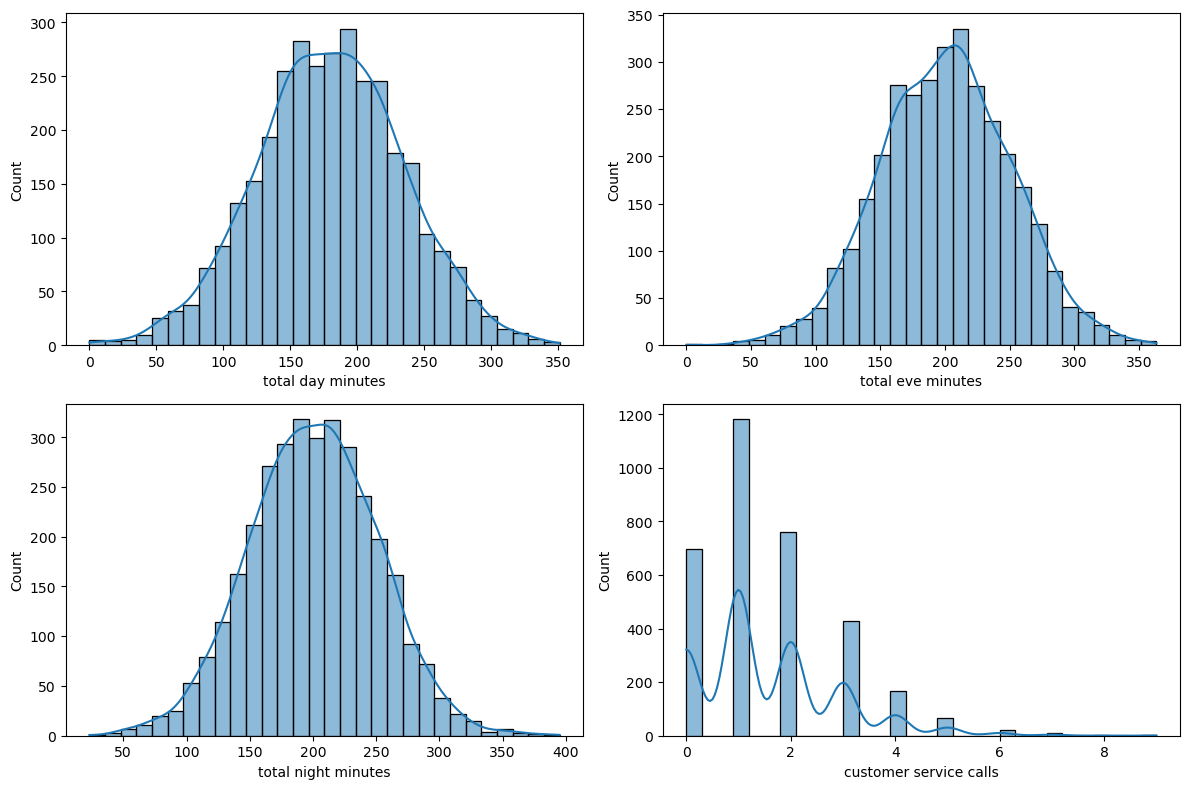

In [40]:
# Ditribution plots to explain the spread of key numerical features
cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for col, ax in zip(cols, axes.flatten()):
    sns.histplot(data[col], kde = True, ax=ax, bins=30)
plt.tight_layout()

2. Comparing the usage patterns across regions

- Daytime

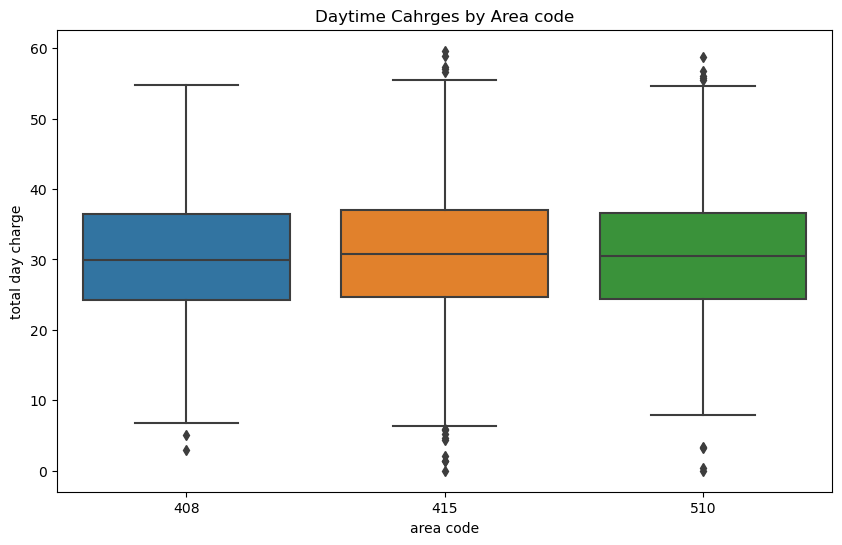

In [41]:
# A boxplot of the Day time charges per area code 
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'area code', y='total day charge', data=data)
plt.title('Daytime Cahrges by Area code')
plt.show()

- Night time

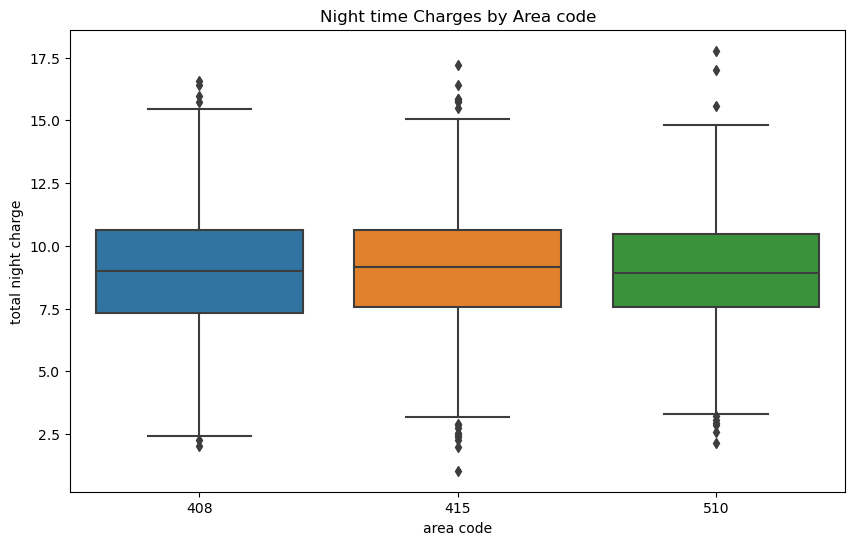

In [42]:
# A boxplot of the Night time charges per area code 
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'area code', y='total night charge', data=data)
plt.title('Night time Charges by Area code')
plt.show()

4. Exploring Interactions between key variables

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

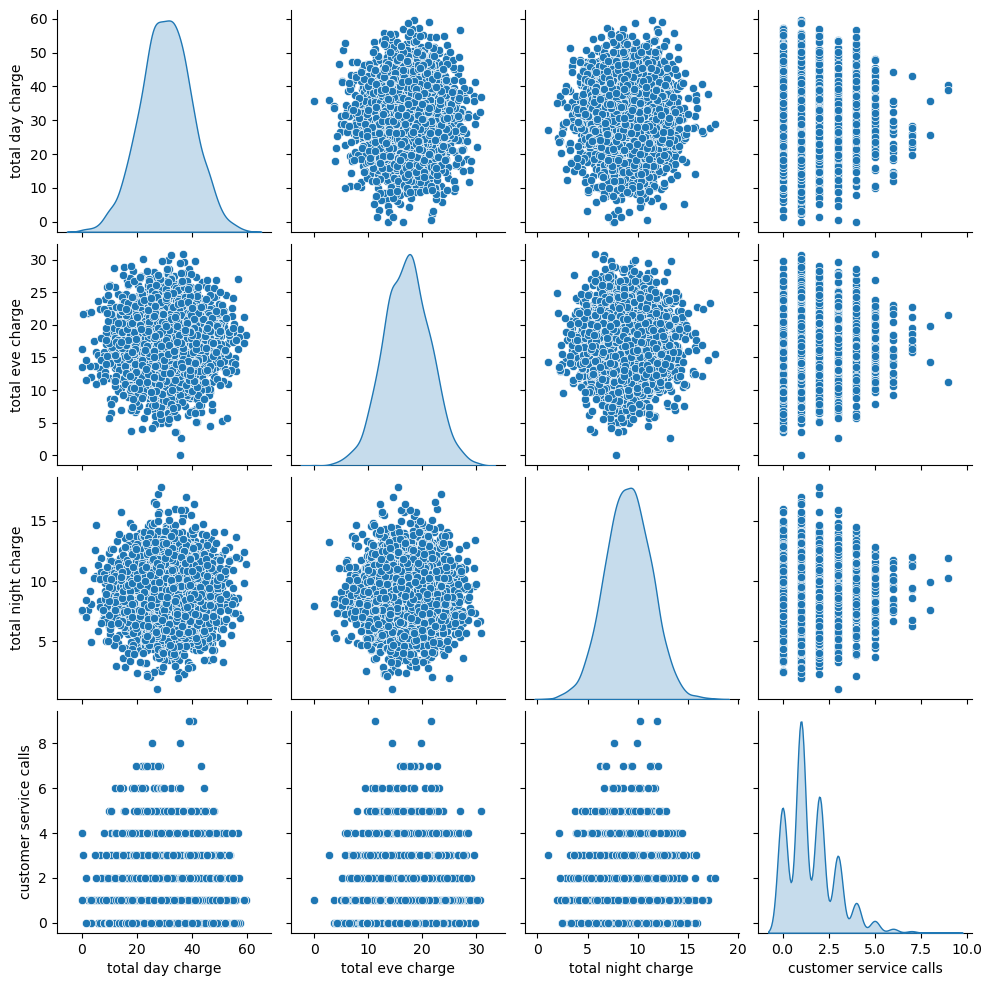

In [43]:
#  The scatter matrix will reveal potential clusters or linear relationships
sns.pairplot(data[['total day charge', 'total eve charge', 
                 'total night charge', 'customer service calls']],
                 diag_kind='kde')

5. Comparing call patterns across time periods:

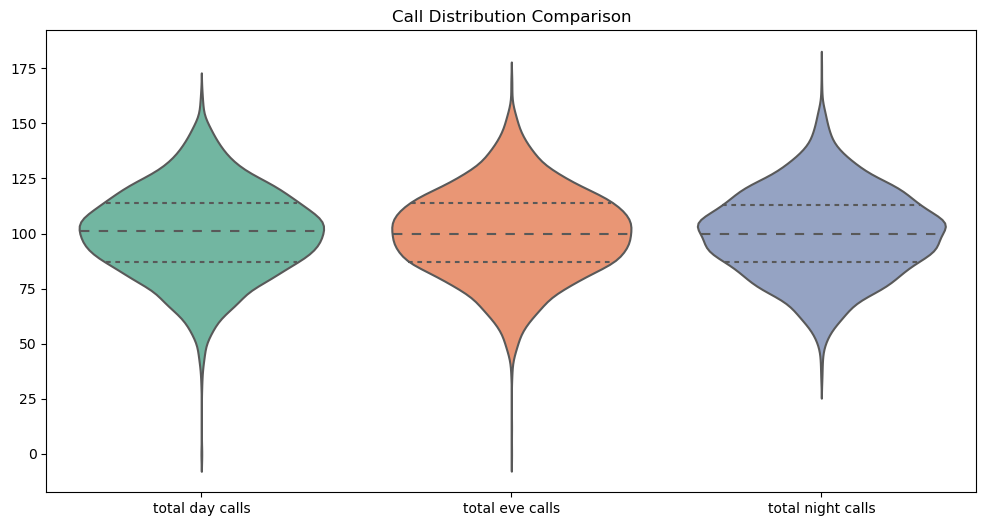

In [44]:
# Violin plots help us understand the call volumes for each time period
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['total day calls', 'total eve calls', 'total night calls']], 
               inner="quartile", palette="Set2")
plt.title('Call Distribution Comparison')
plt.show()

6. Identifying extreme values in key features:

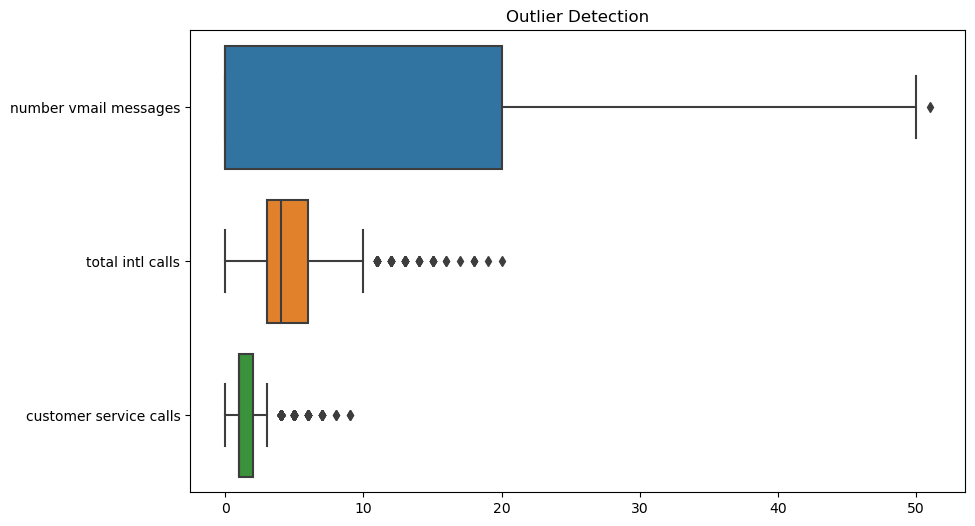

In [45]:
# The boxplots help us detect the ouliers in the data
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['number vmail messages', 'total intl calls', 
                      'customer service calls']], orient='h')
plt.title('Outlier Detection')
plt.show()

7. Caomparing usage patterns across day parts

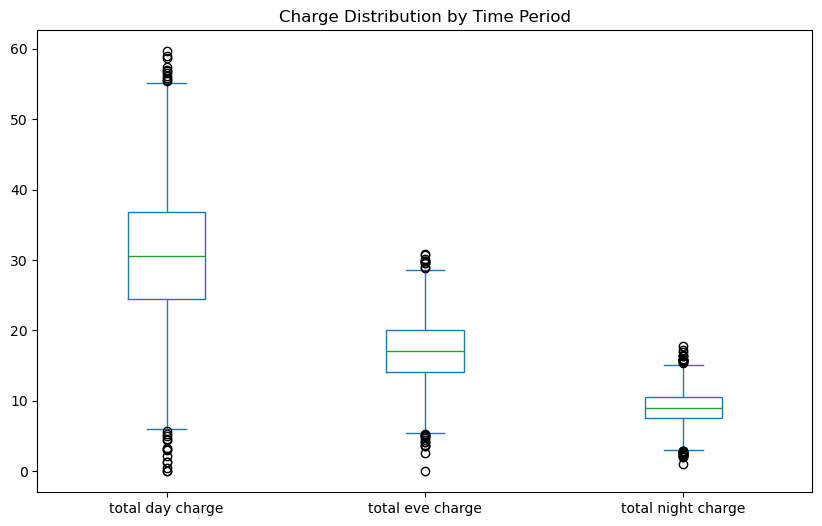

In [46]:
time_cols = ['total day charge', 'total eve charge', 'total night charge']
data[time_cols].plot(kind='box', figsize=(10, 6), title='Charge Distribution by Time Period')
plt.show()

8. Visualizing discrete feature distributions

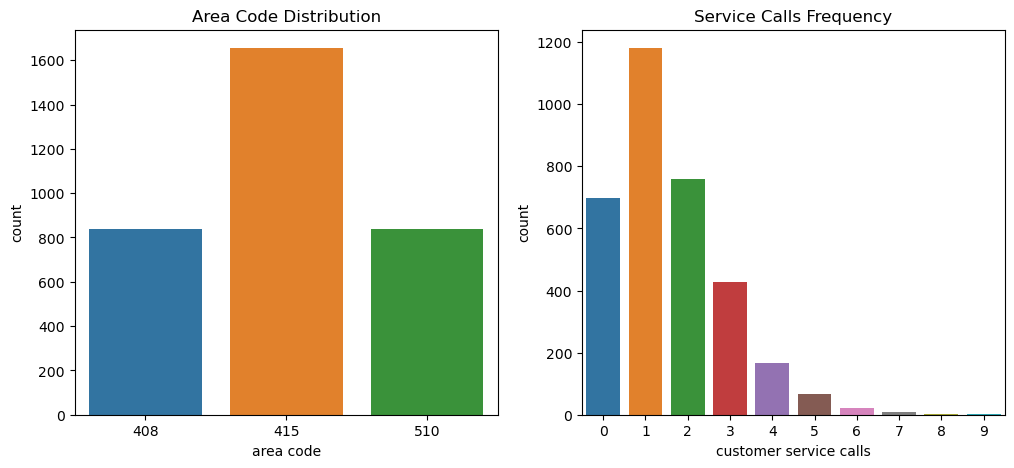

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='area code', data=data, ax=ax[0])
sns.countplot(x='customer service calls', data=data, ax=ax[1])
ax[0].set_title('Area Code Distribution')
ax[1].set_title('Service Calls Frequency')
plt.show()

8. Churn Distribution



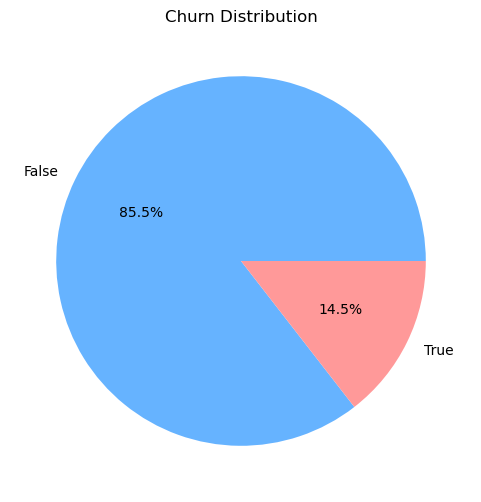

In [48]:
plt.figure(figsize=(6,6))
data['churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

11.  Daytime Usage vs Churn (KDE Plot)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Daytime Minutes Distribution by Churn Status')

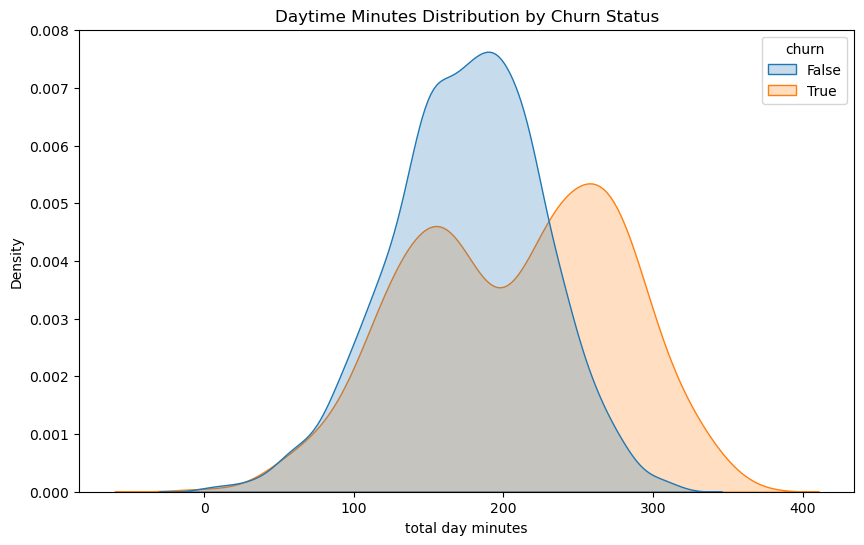

In [49]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='total day minutes', hue='churn', common_norm=False, fill=True)
plt.title('Daytime Minutes Distribution by Churn Status')

12. Churn by Sate (Top 10)

Text(0, 0.5, 'Churn Percentage')

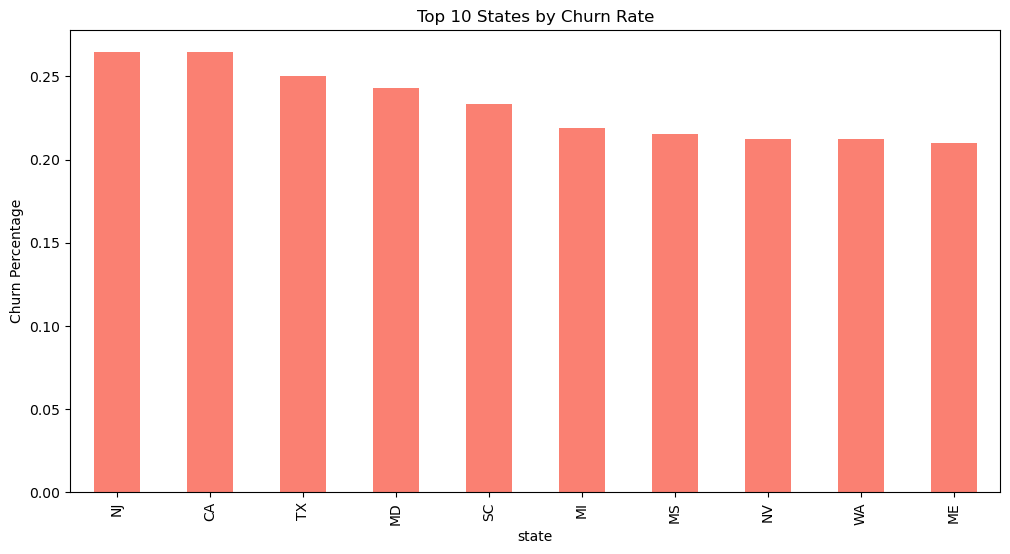

In [50]:
state_churn = data.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
state_churn.plot(kind='bar', color='salmon')
plt.title('Top 10 States by Churn Rate')
plt.ylabel('Churn Percentage')

## Data Preparation:

1. Drop Unnecessary Columns

In [51]:
data = data.drop(['state', 'phone number'], axis=1) # High cardinality/unique identifiers

2. Handle Categorical Variables

In [52]:
# Binary encoding for plan columns
data['international plan'] = data['international plan'].map({'yes' : 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encoding for area code (only 3 categories)
data = pd.get_dummies(data, columns=['area code'], prefix='area')

3. Feature Engineering

In [53]:
# 1. Interactions Features
data['day_charge_per_call'] = data['total day charge'] / (data['total day calls'] + 1e-6)
data['eve_charge_per_call'] = data['total eve charge'] / (data['total eve calls'] + 1e-6)

# 2. Usage Concentration features
data['high_service_calls'] = data['total day charge'] / data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['eve_charge_ratio'] = data['total eve charge'] / data[['total day charge', 'total day charge', 'total eve charge', 'total night charge']].sum(axis=1)

# 3. Service Sensitivity features
data['high_service_calls'] = (data['customer service calls'] > 3).astype(int)
data['service_per_charge'] = data['customer service calls'] / (data ['total day charge'] + 0.1)

# 4. Total usage Features
data['total_charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge']
data['total_calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']

# 5. International Usage Features
data['intl_charge_per_call'] = data['total intl charge']/(data['total intl calls'] + 1e-6)

4. Check and Handle Missing values (if any)

In [54]:
# Check missing values
print(data.isnull().sum())

# For this dataset (no missing values shown), but general approach:
# data.fillna(data.median(), inplace=True)  # For numerical
# data.fillna(data.mode().iloc[0], inplace=True)  # For categorical

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
area_408                  0
area_415                  0
area_510                  0
day_charge_per_call       0
eve_charge_per_call       0
high_service_calls        0
eve_charge_ratio          0
service_per_charge        0
total_charge              0
total_calls               0
intl_charge_per_call      0
dtype: int64


5. Adress Class imbalance

In [55]:
X = data.drop('churn', axis=1)
y= data['churn']

# Only apply to traing data after split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

6. Feature Selection

In [56]:
# Remove redundant features (minutes and correlated charges)
data = data.drop([
    'total day minutes', 'total eve minutes', 'total night minutes',
    'total intl minutes', 'total intl charge' # Keep intl calls only
], axis=1)

7. Data Splitting

In [57]:
# Scale only numerical features (excluding binaries)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
bin_cols = ['international plan', 'voice mail plan', 'high_service_calls']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

9. Final Dataset Preparation

        - For Logistic Regression

In [58]:
lr_train = X_train_scaled
lr_test = X_test_scaled

        - For Decision Trees

In [59]:
dt_train = X_train
dt_test = X_test

### Key Feature Engineering Decisions:

- Interaction Features: Created charge-per-call metrics to capture value perception

- Usage Patterns: Added time-of-day usage ratios to identify peak usage preferences

- Service Sensitivity: Engineered features linking service calls to spending

- Behavioral Flags: Created binary flags for high service calls

- International Usage: Focused on call patterns rather than charges

### Feature Set After Preparation

In [60]:
print(lr_train.columns)

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'area_408', 'area_415',
       'area_510', 'day_charge_per_call', 'eve_charge_per_call',
       'high_service_calls', 'eve_charge_ratio', 'service_per_charge',
       'total_charge', 'total_calls', 'intl_charge_per_call'],
      dtype='object')


## Modeling 